In [1]:
%matplotlib inline
from collections import OrderedDict
import itertools
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotting as mplt
import seaborn as sns
import sys
from sklearn.preprocessing import normalize

pkg_dir = '/home/gbuster/sandbox/reV2'
sys.path.append(pkg_dir)
from reV.rpm.clusters import RPMClusters, ClusteringMethods
from reV.rpm.rpm import RPMClusterManager as rcm

# Plotting settings
sns.set_style("white")
sns.set_style("ticks")
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
fname = '/lustre/eaglefs/projects/naris/extreme_events/generation/pv_ca_2012.h5'
with h5py.File(fname, 'r') as f:
    solar_meta = pd.DataFrame(f['meta'][...])
    solar_gids = solar_meta.index.values

fname = '/lustre/eaglefs/projects/naris/extreme_events/generation/v90_full_ca_2012.h5'
with h5py.File(fname, 'r') as f:
    wind_meta = pd.DataFrame(f['meta'][...])
    wind_gids = wind_meta.iloc[::15].index.values

# Not Normalized

In [3]:
clusters = RPMClusters('/lustre/eaglefs/projects/naris/extreme_events/generation/v90_full_ca_2012.h5', wind_gids, n_clusters=6)

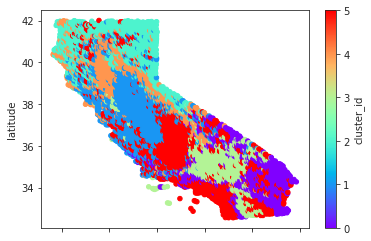

In [4]:
labels = clusters._cluster_coefficients()
clusters.meta['cluster_id'] = labels
clusters.meta.plot.scatter(x='longitude', y='latitude', c='cluster_id', cmap='rainbow')
plt.show()

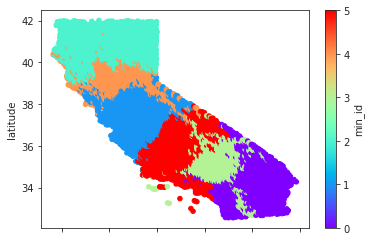

In [5]:
new_labels = clusters._dist_rank_optimization()
test = clusters.meta.copy()
test['min_id'] = new_labels
test.plot.scatter(x='longitude', y='latitude', c='min_id', cmap='rainbow')
plt.show()

In [6]:
clusters._cluster()

In [7]:
clusters.meta.head()

,gen_gid,latitude,longitude,cluster_id,rank
0,0,38.928951,-123.727402,5,403.0
1,15,38.889271,-123.658478,5,417.0
2,30,40.368793,-124.359268,5,268.0
3,45,38.982597,-123.676392,5,261.0
4,60,40.392628,-124.344879,5,275.0


# Manager Dev

In [8]:
fname = '/lustre/eaglefs/projects/naris/extreme_events/generation/v90_full_ca_2012.h5'
counties =  wind_meta.loc[:, 'county'].str.decode('utf-8').unique()
rpm_meta = pd.DataFrame({'region': counties})
rpm_meta['clusters'] = 3

rpm = rcm(fname, rpm_meta, rpm_region_col='county')

In [9]:
rpm._cluster()

In [10]:
rpm_clusters = rpm._combine_region_clusters(rpm._rpm_regions)
rpm_clusters.head()

,gen_gid,latitude,longitude,cluster_id,rank
0,5588,37.788895,-122.317932,Alameda-2,64.0
1,5589,37.806366,-122.325470,Alameda-2,48.0
2,5877,37.777378,-122.288284,Alameda-2,79.0
3,5878,37.794853,-122.295822,Alameda-2,80.0
4,5879,37.812328,-122.303345,Alameda-2,63.0


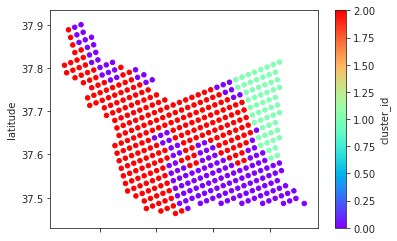

In [11]:
region = rpm._rpm_regions['Alameda']['clusters'].copy()
region.plot.scatter(x='longitude', y='latitude', c='cluster_id', cmap='rainbow')
plt.show()

In [12]:
out_file = '/lustre/eaglefs/scratch/gbuster/rev/rpm/rpm_clusters.csv'
rpm.save_clusters(out_file)